#Importing the Dependencies

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


Data Collection and Analysis

In [5]:
#loading the data from a csv to pandas DataFrame
df=pd.read_csv('/content/insurance.csv')

In [6]:
#first 5 Rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
#number of rows and columns
df.shape

(1338, 7)

In [8]:
#info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features


*   Sex
*   Smoker
*   Region






In [9]:
#checking the null values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Data Analysis

In [10]:
#statistical Measures of the dataset
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

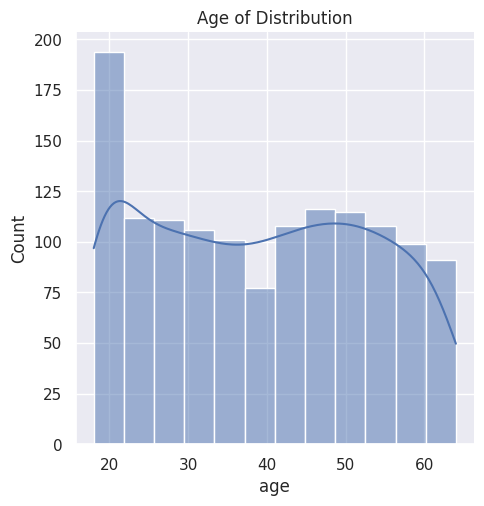

In [11]:
#distrivution of the age value
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['age'],kde=True)
plt.title("Age of Distribution")
plt.show()

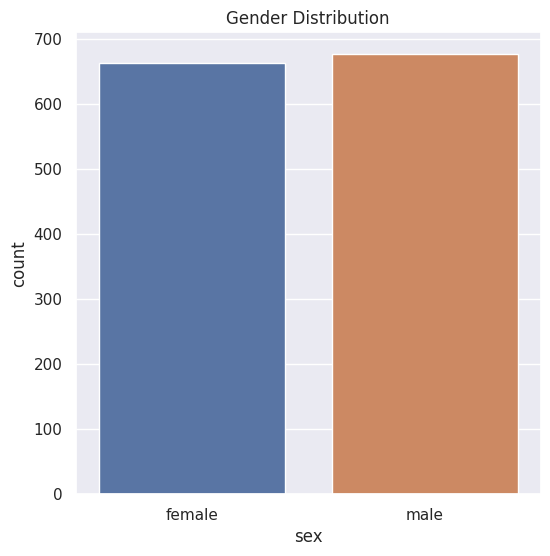

In [12]:
#Gender Column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df,hue='sex')
plt.title("Gender Distribution")
plt.show()

In [13]:
df['sex'].value_counts()

,count
sex,
male,676
female,662


<Figure size 600x600 with 0 Axes>

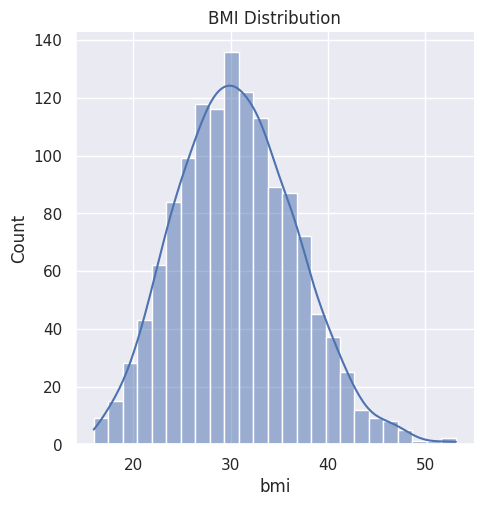

In [14]:
#bmi distibution
plt.figure(figsize=(6,6))
sns.displot(df['bmi'],kde=True)
plt.title("BMI Distribution")
plt.show()

Normal BMI range -> 18 to 24.9

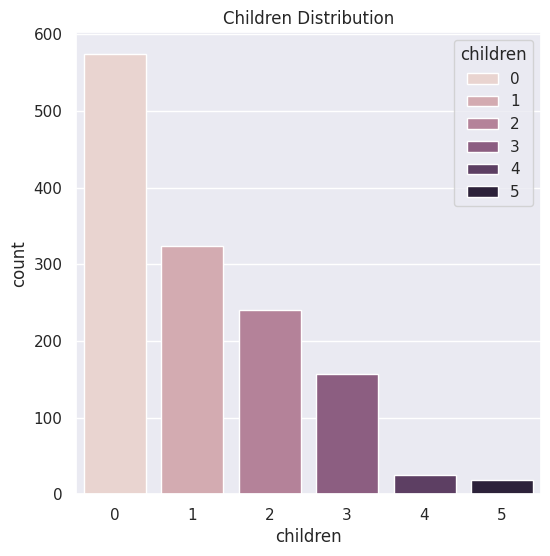

In [15]:
#Children Column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=df,hue='children')
plt.title("Children Distribution")
plt.show()

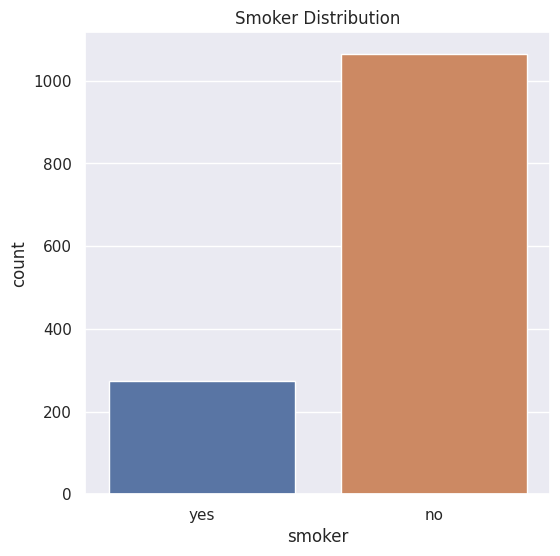

In [16]:
#smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df,hue='smoker')
plt.title("Smoker Distribution")
plt.show()

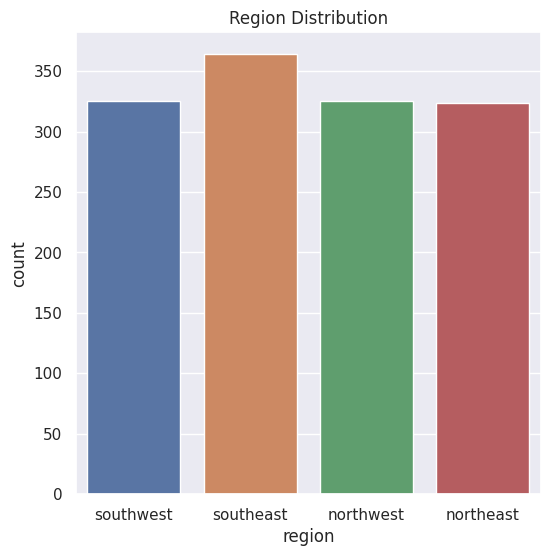

In [17]:
#region Column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=df,hue='region')
plt.title("Region Distribution")
plt.show()

In [18]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<Figure size 600x600 with 0 Axes>

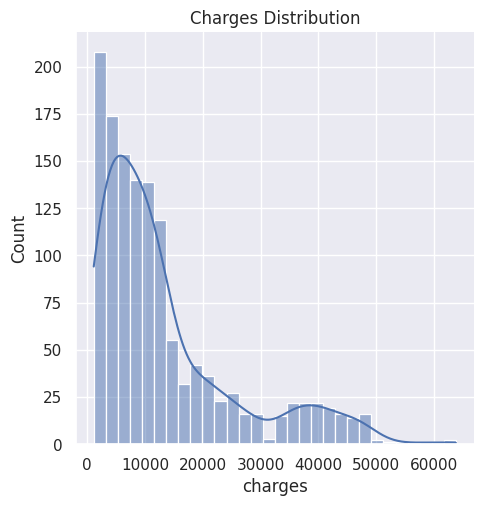

In [19]:
#distribution of charges
plt.figure(figsize=(6,6))
sns.displot(df['charges'],kde=True)
plt.title("Charges Distribution")
plt.show()

Data Preprocessing

Encoding the Categorical features

In [20]:
#encoding the sex column
df['sex']=df['sex'].map({'female':0,'male':1})
#encoding the smoker column
df['smoker']=df['smoker'].map({'yes':0,'no':1})
#encoding the region column
df['region']=df['region'].map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


Splitting the features and target


In [22]:
X=df.drop(columns='charges',axis=1)
Y=df['charges']

In [23]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       0       0
1      18    1  33.770         1       1       1
2      28    1  33.000         3       1       1
3      33    1  22.705         0       1       2
4      32    1  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       1       2
1334   18    0  31.920         0       1       3
1335   18    0  36.850         0       1       1
1336   21    0  25.800         0       1       0
1337   61    0  29.070         0       0       2

[1338 rows x 6 columns]


In [24]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the train and test

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

#Model Training

In [26]:
#model
model=XGBRegressor()
model.fit(X_train,Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#Model Evaluation

In [27]:
#prediction on training data
training_data_prediction=model.predict(X_train)
R2_score_train=metrics.r2_score(Y_train,training_data_prediction)
print("R2 score for the training data :", R2_score_train )

R2 score for the training data : 0.9958604157302872


In [28]:
#prediction on testing data
testing_data_prediction=model.predict(X_test)
R2_score_test=metrics.r2_score(Y_test,testing_data_prediction)
print("R2 score for the testing data :", R2_score_test)

R2 score for the testing data : 0.8084182104090256


#Building  a predictive System

In [34]:
input=(23,1,34.4,0,1,0)

#changing input to numpy array
input_as_np_array=np.asarray(input)
#reshaping the array
input_reshaped=input_as_np_array.reshape(1,-1)

prediction=model.predict(input_reshaped)
print(prediction)

print("The insurance cost is ",prediction[0])

[1841.3792]
The insurance cost is  1841.3792
